In [1]:
import numpy as np
import matplotlib.pyplot as plt

import sys 
path="../"
sys.path.append(path)
import main as ST

path="../../"
sys.path.append(path)
from custom_tools import plot_one_pulse, get_mids_from_edges, get_T_in_log10_Kelvin

phase_mids=get_mids_from_edges(ST.data.phases)
channel_mids=get_mids_from_edges(ST.NICER.channel_edges)

/=============================================\
| X-PSI: X-ray Pulse Simulation and Inference |
|---------------------------------------------|
|                Version: 2.0.0               |
|---------------------------------------------|
|      https://xpsi-group.github.io/xpsi      |
\=============================================/

Imported GetDist version: 1.4
Imported nestcheck version: 0.2.1
E: failed to import some OS environment variables, using defaults.
machine:  local
num_energies:  128
num_leaves:  128
sqrt_num_cells:  128
integrator: azimuthal_invariance
interpolator: split
Rank reporting: 0
Setting channels for event data...
Channels set.
Setting channels for loaded instrument response (sub)matrix...
Channels set.
No parameters supplied... empty subspace created.
Creating parameter:
    > Named "frequency" with fixed value 4.010e+02.
    > Spin frequency [Hz].
Creating parameter:
    > Named "mass" with bounds [1.000e+00, 3.000e+00].
    > Gravitational mass [solar masses

In [2]:
background_count_rate = np.loadtxt('J1808_synthetic_diskbb_background.txt')
print(background_count_rate.shape)

(280, 32)


(<Figure size 500x300 with 2 Axes>,
 <AxesSubplot: xlabel='Phase', ylabel='Energy (keV)'>)

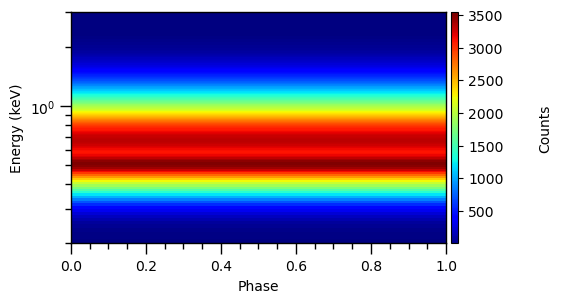

In [3]:
plot_one_pulse(background_count_rate*ST.data.exposure_time, ST.data.phases, ST.NICER.channel_edges)

In [4]:
summed_loglike, loglike, expected_counts, star = ST.signal.poisson_likelihood_given_background(background_count_rate)
print(np.sum(loglike))

194068750.12537533


In [5]:
expected_counts

array([[ 23.30776167,  23.25070395,  23.18170858, ...,  23.35466884,
         23.36449758,  23.3474536 ],
       [ 36.00829256,  35.92590294,  35.82639879, ...,  36.0768276 ,
         36.0906234 ,  36.06574126],
       [ 54.30490345,  54.19238225,  54.05647447, ...,  54.39831686,
         54.41725343,  54.38333461],
       ...,
       [119.16416359, 115.33605996, 111.31633037, ..., 126.60572421,
        125.12856444, 122.53514507],
       [117.07561963, 113.28201554, 109.30130996, ..., 124.4718123 ,
        122.99697697, 120.4196652 ],
       [115.00657259, 111.2479597 , 107.3067312 , ..., 122.35594214,
        120.88386854, 118.32316788]])

(<Figure size 500x300 with 2 Axes>,
 <AxesSubplot: xlabel='Phase', ylabel='Energy (keV)'>)

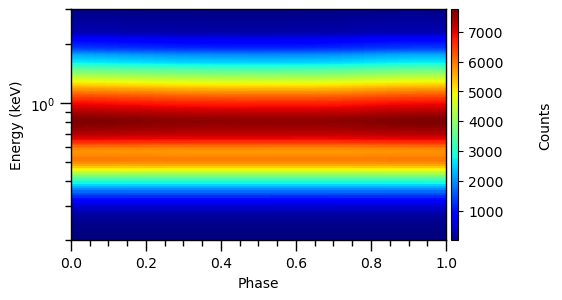

In [6]:
plot_one_pulse(ST.data.counts, ST.data.phases, ST.NICER.channel_edges)
# THE DATA

(<Figure size 500x300 with 2 Axes>,
 <AxesSubplot: xlabel='Phase', ylabel='Energy (keV)'>)

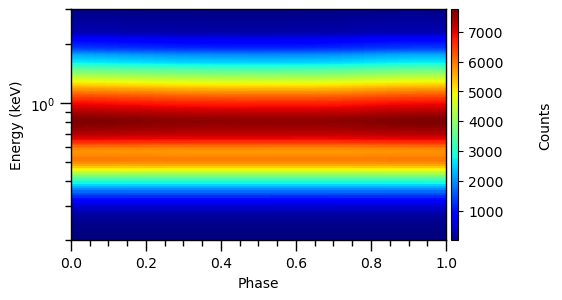

In [7]:
plot_one_pulse(expected_counts, ST.data.phases, ST.NICER.channel_edges)
# EXPECTED COUNTS WITH FIXED BACKGROUND FROM MODEL

(<Figure size 500x300 with 2 Axes>,
 <AxesSubplot: xlabel='Phase', ylabel='Energy (keV)'>)

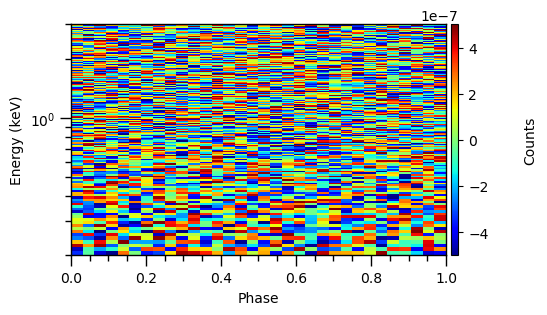

In [8]:
plot_one_pulse(expected_counts-ST.data.counts, ST.data.phases, ST.NICER.channel_edges)
# RESIDUAL PLOT SHOULD LEAD TO ZERO (But it doesn't)

In [9]:
ST.data.counts

array([[ 23.307762,  23.250704,  23.181709, ...,  23.354669,  23.364498,
         23.347454],
       [ 36.008293,  35.925903,  35.826399, ...,  36.076828,  36.090623,
         36.065741],
       [ 54.304903,  54.192382,  54.056474, ...,  54.398317,  54.417253,
         54.383335],
       ...,
       [119.164164, 115.33606 , 111.31633 , ..., 126.605724, 125.128564,
        122.535145],
       [117.07562 , 113.282016, 109.30131 , ..., 124.471812, 122.996977,
        120.419665],
       [115.006573, 111.24796 , 107.306731, ..., 122.355942, 120.883869,
        118.323168]])

In [10]:
expected_counts

array([[ 23.30776167,  23.25070395,  23.18170858, ...,  23.35466884,
         23.36449758,  23.3474536 ],
       [ 36.00829256,  35.92590294,  35.82639879, ...,  36.0768276 ,
         36.0906234 ,  36.06574126],
       [ 54.30490345,  54.19238225,  54.05647447, ...,  54.39831686,
         54.41725343,  54.38333461],
       ...,
       [119.16416359, 115.33605996, 111.31633037, ..., 126.60572421,
        125.12856444, 122.53514507],
       [117.07561963, 113.28201554, 109.30130996, ..., 124.4718123 ,
        122.99697697, 120.4196652 ],
       [115.00657259, 111.2479597 , 107.3067312 , ..., 122.35594214,
        120.88386854, 118.32316788]])

(<Figure size 500x300 with 2 Axes>,
 <AxesSubplot: xlabel='Phase', ylabel='Energy (keV)'>)

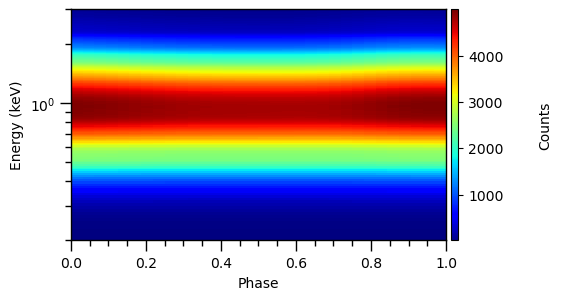

In [11]:
plot_one_pulse(star, ST.data.phases, ST.NICER.channel_edges)
# THE STAR (NO BACKGROUND)

In [12]:
pf_background = (ST.data.counts-star)/ST.data.exposure_time
pf_summed_loglike, pf_loglike, pf_expected_counts, pf_star = ST.signal.poisson_likelihood_given_background(pf_background)
np.sum(pf_loglike)

194068750.12537533

(<Figure size 500x300 with 2 Axes>,
 <AxesSubplot: xlabel='Phase', ylabel='Energy (keV)'>)

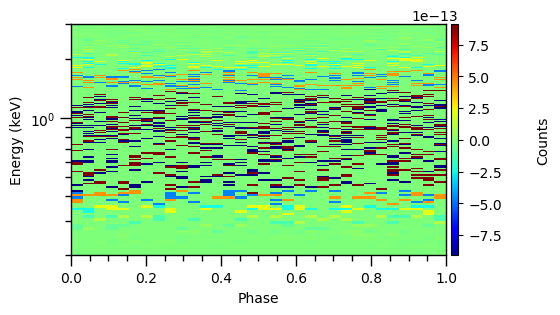

In [13]:
plot_one_pulse(pf_expected_counts-ST.data.counts, ST.data.phases, ST.NICER.channel_edges)